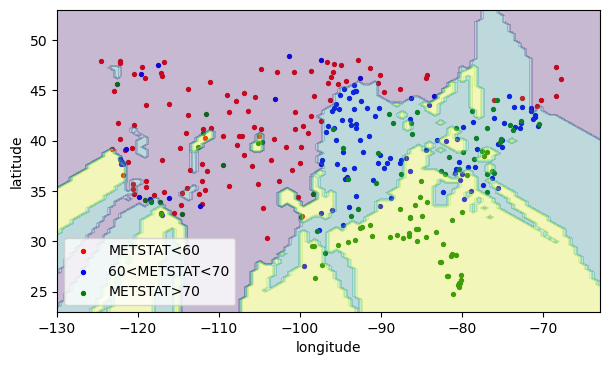

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

#read dataset from file(already shuffled)
data = pd.read_csv("dataCollection.csv")

number = data['USAF'].values
latitude = data['Latitude'].values
longitude = data['Longitude'].values
metstat = data['Avg hourly METSTAT in 2005 (Wh/m^2)'].values
length = number.size
train_length = 600
test_length = length - train_length
classes = np.empty(length,dtype=int)

N = 2 #No. of features

#define classes labels
C = 3 # No. of classes
for i in range(length):
    if metstat[i] < 60:
        classes[i]=0
    elif 60 <= metstat[i] < 70:
        classes[i]=1
    else:
        classes[i]=2


#split shuffled data for training and testing
x_train = longitude[:train_length]
y_train = latitude[:train_length]
classes_train = classes[:train_length]
x_test = longitude[train_length:]
y_test = latitude[train_length:]
classes_test = classes[train_length:]


# define model, which compute C linear combinations, one per classifier
def distance(x1,x2):
    a = np.linalg.norm(x1 - x2, ord = 2)
    return a


def findKNeighbors(testpoint, K):
    distances = np.zeros(train_length)
    classes_number = np.zeros((C), dtype = int)
    for train_index in range(train_length):
        distances[train_index] = distance(testpoint, x[train_index,:])
    neighbors = distances.argsort()[0:K]
    for i in range(K):
        classes_number[classes_train[neighbors[i]]] += 1
    return np.argmax(classes_number)


K = 4
x = np.c_[x_train,y_train]
y = classes_train.T.reshape(1,-1)


#plot test result
colors = ['r','b','g']
labels = ['METSTAT<60','60<METSTAT<70','METSTAT>70']
plt.figure(figsize=(7,4),dpi=100)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.xlim(-130, -63)
plt.ylim(23, 53)
for target in range(C):
    plt.scatter(x_test[classes_test==target], y_test[classes_test==target], label=labels[target], c=colors[target],s=8)

xp1, xp2 = np.meshgrid(np.linspace(-130, -63,100),np.linspace(23, 53, 100))
xp1_v = xp1.reshape(-1,1)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)
classes_area = np.zeros(xp1.size)
for i in range(xp1.size):
    classes_area[i] = findKNeighbors(Xp_data[i,:], 4)
classes_area=classes_area.reshape(xp1.shape)
plt.contourf(xp1,xp2,classes_area, alpha=.3)
plt.legend()